In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v1.db


In [2]:
# Connect to db
Sql = sqlite3.connect('/kaggle/input/clubhouse-dataset/Clubhouse_Dataset_v1.db')
# Read the file into panda
data = pd.read_sql_query("SELECT * FROM user", Sql)
data.head()

,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,null,4187268,599,2020-03-17T07:51:28.085566+00:00,null
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,null,3718334,1861,2020-03-17T14:36:19.468976+00:00,null
2,8,Johnny Appleseed,None,apple1,null,srt_tester_9,20,81,2020-03-19T19:47:00.323603+00:00,null
3,10,DK 🖍,https://clubhouseprod.s3.amazonaws.com:443/10_...,dk,dksf,null,49538,173,2020-03-19T23:38:52.574777+00:00,null
4,12,Jonathan Gheller,https://clubhouseprod.s3.amazonaws.com:443/12_...,jonathan,jgheller,null,21250,81,2020-03-20T02:30:22.188084+00:00,null


In [3]:
data[data['name'].str.contains('Tuba ')]

,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile
332549,367394,Tuba Drip,https://clubhouseprod.s3.amazonaws.com:443/367...,tubad,null,null,5,12,2020-12-22T16:03:00.425793+00:00,243578
403329,448461,Tuba Kenn,https://clubhouseprod.s3.amazonaws.com:443/448...,tubakenn,null,pimpin_kenn,214,156,2020-12-15T17:26:58.945749+00:00,119115


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300515 entries, 0 to 1300514
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   user_id                  1300515 non-null  int64 
 1   name                     1300515 non-null  object
 2   photo_url                1236637 non-null  object
 3   username                 1300515 non-null  object
 4   twitter                  1300515 non-null  object
 5   instagram                1300515 non-null  object
 6   num_followers            1300515 non-null  int64 
 7   num_following            1300515 non-null  int64 
 8   time_created             1300515 non-null  object
 9   invited_by_user_profile  1300515 non-null  object
dtypes: int64(3), object(7)
memory usage: 99.2+ MB


In [5]:
data.isnull().sum()

user_id                        0
name                           0
photo_url                  63878
username                       0
twitter                        0
instagram                      0
num_followers                  0
num_following                  0
time_created                   0
invited_by_user_profile        0
dtype: int64

In [6]:
data.describe()

,user_id,num_followers,num_following
count,1.300515e+06,1.300515e+06,1.300515e+06
mean,7.303800e+05,2.603839e+02,1.154931e+02
std,4.276844e+05,1.674231e+04,1.945045e+02
min,4.000000e+00,0.000000e+00,0.000000e+00
25%,3.592120e+05,1.400000e+01,2.600000e+01
50%,7.258520e+05,3.700000e+01,6.100000e+01
75%,1.099280e+06,9.900000e+01,1.190000e+02
max,1.499999e+06,4.187268e+06,2.504000e+03


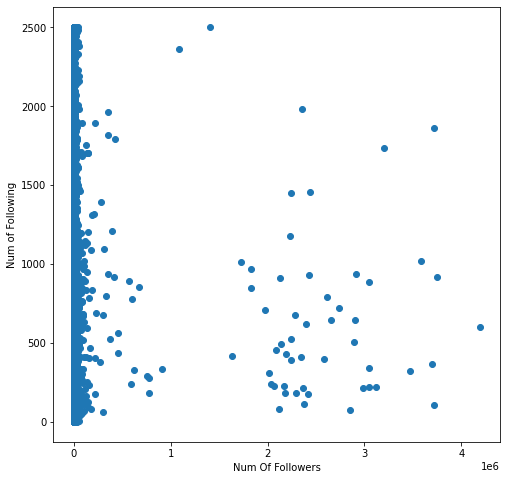

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

fig = plt.figure(figsize=(8,8))
plt.scatter(x=data['num_followers'], y=data['num_following'])
plt.xlabel('Num Of Followers')
plt.ylabel('Num of Following')

plt.show()

In [8]:
data.loc[(data['twitter'] != 'null'), 'twitter_count'] = 1
data.loc[(data['twitter'] == 'null'), 'twitter_count'] = 0
data.loc[(data['instagram'] != 'null'), 'instagram_count'] = 1
data.loc[(data['instagram'] == 'null'), 'instagram_count'] = 0
data.head()

,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile,twitter_count,instagram_count
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,null,4187268,599,2020-03-17T07:51:28.085566+00:00,null,1.0,0.0
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,null,3718334,1861,2020-03-17T14:36:19.468976+00:00,null,1.0,0.0
2,8,Johnny Appleseed,None,apple1,null,srt_tester_9,20,81,2020-03-19T19:47:00.323603+00:00,null,0.0,1.0
3,10,DK 🖍,https://clubhouseprod.s3.amazonaws.com:443/10_...,dk,dksf,null,49538,173,2020-03-19T23:38:52.574777+00:00,null,1.0,0.0
4,12,Jonathan Gheller,https://clubhouseprod.s3.amazonaws.com:443/12_...,jonathan,jgheller,null,21250,81,2020-03-20T02:30:22.188084+00:00,null,1.0,0.0


Visualize the number of followers by Twitter users vs Instagram users.



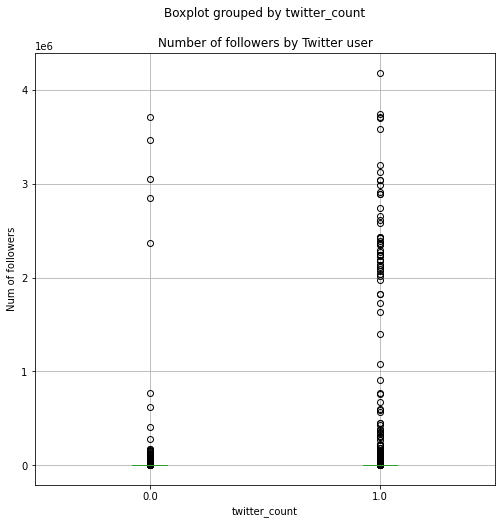

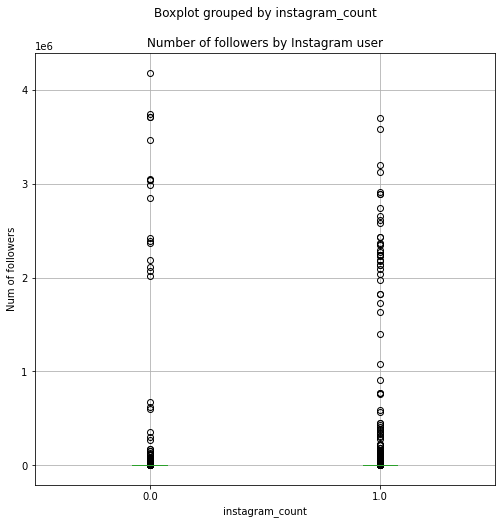

In [9]:
print ('Visualize the number of followers by Twitter users vs Instagram users.\n')

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
data.boxplot(column='num_followers', by='twitter_count', ax=ax)
ax.set_title('Number of followers by Twitter user')
ax.set_ylabel('Num of followers')
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
data.boxplot(column='num_followers', by='instagram_count', ax=ax)
ax.set_title('Number of followers by Instagram user')
ax.set_ylabel('Num of followers')
plt.show()

Visualize the number of followings by Twitter users vs Instagram users.


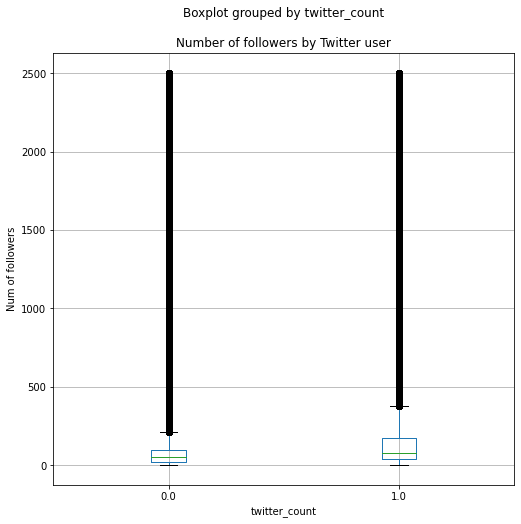

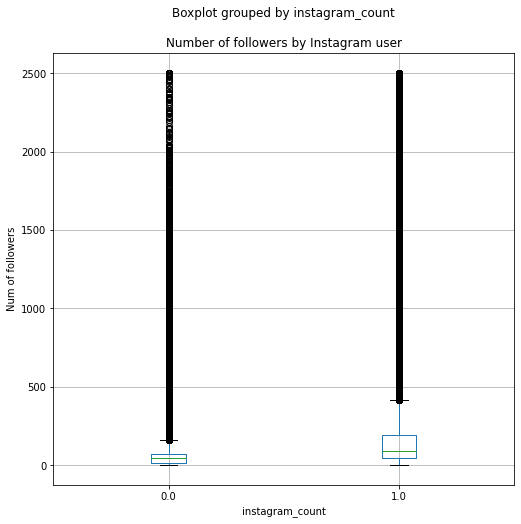

In [10]:
print ('Visualize the number of followings by Twitter users vs Instagram users.')

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
data.boxplot(column='num_following', by='twitter_count', ax=ax)
ax.set_title('Number of followers by Twitter user')
ax.set_ylabel('Num of followers')
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
data.boxplot(column='num_following', by='instagram_count', ax=ax)
ax.set_title('Number of followers by Instagram user')
ax.set_ylabel('Num of followers')
plt.show()

In [11]:
data['time_created']  = [time.split('T')[0] for time in data['time_created']]

In [12]:
data.groupby('time_created').sum()

,user_id,num_followers,num_following,twitter_count,instagram_count
time_created,,,,,
2020-03-17,10307,7924152,2460,3.0,0.0
2020-03-19,18,49558,254,1.0,1.0
2020-03-20,25,68678,347,2.0,0.0
2020-03-21,45,77695,860,3.0,0.0
2020-03-22,74,37572,2129,4.0,1.0
...,...,...,...,...,...
2021-04-01,213767544,451,7514,51.0,29.0
2021-04-02,167884205,271,5404,38.0,18.0
2021-04-03,165320480,360,7874,53.0,21.0


In [13]:
data[data['time_created'] == '2020-03-17']

,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile,twitter_count,instagram_count
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,null,4187268,599,2020-03-17,null,1.0,0.0
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,null,3718334,1861,2020-03-17,null,1.0,0.0
9002,10298,Clubhouse,https://clubhouseprod.s3.amazonaws.com:443/102...,clubhouse,joinClubhouse,null,18550,0,2020-03-17,null,1.0,0.0


In [14]:
timeReportData = data['time_created'].value_counts()
type(timeReportData)
type(timeReportData),timeReportData
timeReportData = pd.DataFrame({'Time':timeReportData.to_frame().index, 'Count':timeReportData.to_frame().time_created},index=None)
timeReportData
timeReportData.reset_index(drop=True, inplace=True)
timeReportData

,Time,Count
0,2020-12-30,73862
1,2020-12-29,69506
2,2020-12-23,58500
3,2020-12-28,55535
4,2020-12-31,55330
...,...,...
379,2020-03-17,3
380,2020-03-28,2
381,2020-03-20,2
382,2020-03-19,2


In [15]:
timeReportData['Time']

0      2020-12-30
1      2020-12-29
2      2020-12-23
3      2020-12-28
4      2020-12-31
          ...    
379    2020-03-17
380    2020-03-28
381    2020-03-20
382    2020-03-19
383    2020-03-29
Name: Time, Length: 384, dtype: object

In [16]:
top10mostfollowed = data.sort_values(by=['num_followers'],ascending=False).head(10)

In [17]:
top10mostfollowed

,user_id,name,photo_url,username,twitter,instagram,num_followers,num_following,time_created,invited_by_user_profile,twitter_count,instagram_count
0,4,Rohan Seth,https://clubhouseprod.s3.amazonaws.com:443/4_b...,rohan,rohanseth,null,4187268,599,2020-03-17,null,1.0,0.0
796,977,Marc Andreessen,https://clubhouseprod.s3.amazonaws.com:443/977...,pmarca,pmarca,null,3749921,920,2020-04-23,null,1.0,0.0
1,5,Paul Davison,https://clubhouseprod.s3.amazonaws.com:443/5_e...,paul,pdavison,null,3718334,1861,2020-03-17,null,1.0,0.0
750,904,Jared Leto,https://clubhouseprod.s3.amazonaws.com:443/904...,jaredleto,null,null,3715696,106,2020-04-21,null,0.0,0.0
729,881,🆑 Chris Lyons,https://clubhouseprod.s3.amazonaws.com:443/881...,chrislyons,ChrisLyons,chrislyons,3700203,365,2020-04-21,null,1.0,1.0
1419,1908,Tiffany Haddish,https://clubhouseprod.s3.amazonaws.com:443/190...,tiffanyhaddish1,TiffanyHaddish,tiffanyhaddish,3586951,1019,2020-05-16,881,1.0,1.0
1437,1940,Felicia Horowitz,https://clubhouseprod.s3.amazonaws.com:443/194...,feliciahorowitz,null,null,3465827,324,2020-05-17,null,0.0,0.0
3392,4588,Bomani X,https://clubhouseprod.s3.amazonaws.com:443/458...,iambomanix,iambomanix,iambomanix,3197026,1736,2020-07-05,null,1.0,1.0
774,946,Scooter,https://clubhouseprod.s3.amazonaws.com:443/946...,scooter,scooterbraun,scooterbraun,3123202,221,2020-04-22,null,1.0,1.0
1492,2021,Van Jones,https://clubhouseprod.s3.amazonaws.com:443/202...,van,null,null,3049558,342,2020-05-19,104,0.0,0.0


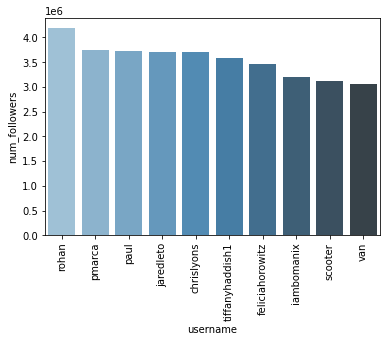

In [18]:
topfollowedchart = sns.barplot(y= top10mostfollowed['num_followers'],x=top10mostfollowed['username'],palette="Blues_d").set_xticklabels(top10mostfollowed['username'], rotation=90);

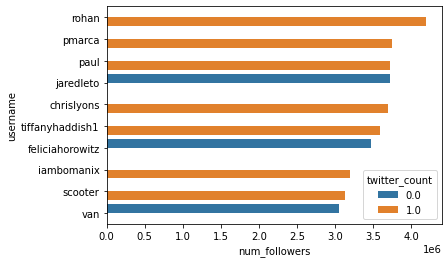

In [19]:
 ax = sns.barplot(x="num_followers", y="username", hue="twitter_count", data=top10mostfollowed)